In [21]:
import pandas as pd
import pandas_datareader.data as web
import datetime
from pathlib import Path
import numpy as np
#import pandas_datareader as pdr
import hvplot.pandas
import seaborn as sns

In [ ]:
bitcoin_file = Path("Resources/bitcoin_data.csv")
bitcoin_df.drop(columns = ["Open", "High", "Low", "Close", "Volume"], inplace=True)
bitcoin_df.columns = ["Bitcoin"]

In [2]:
#Read data files

quandl_file = Path("Resources/Quandl_data.csv")
asset_file = Path("Resources/asset_prices.csv")
bitcoin_file = Path("Resources/bitcoin_data.csv")

alt_data_df = pd.read_csv(quandl_file, index_col = "yr_mo", infer_datetime_format = True, parse_dates = True)
asset_prices_df = pd.read_csv(asset_file, index_col = "Date", infer_datetime_format = True, parse_dates = True)
bitcoin_df = pd.read_csv(bitcoin_file, index_col = "Date" , infer_datetime_format = True, parse_dates = True)

bitcoin_df.drop(columns = ["Open", "High", "Low", "Close", "Volume"], inplace=True)
bitcoin_df.columns = ["Bitcoin"]

asset_prices_df.drop(columns = "BLOK", inplace= True)
asset_prices_df = pd.merge(asset_prices_df, bitcoin_df, how = "inner", on= "Date" )
asset_prices_df.sort_index(inplace=True)

In [3]:
alt_data_df.head()

,SP500_ia_price,SP500_pe,SP500_pe_shiller,SP500_eyield,30y_mort_int,15y_mort_int,Unemployment_ST,Unemployment_LT,PPI_pp,CPI_urban,GDP_R,GDP_N
yr_mo,,,,,,,,,,,,
2005-01-01,1588.39,19.99,26.59,5.00,5.710,5.1725,5.020076,5.020076,94.8,111.3,14810.87545,12795.23037
2005-04-01,1534.19,19.02,25.41,5.26,5.855,5.4075,5.011637,5.011637,90.4,113.4,14908.47011,12969.74010
2005-07-01,1603.76,19.00,26.29,5.26,5.695,5.2775,5.003654,5.003654,83.8,113.7,15003.90414,13170.81850
2005-10-01,1534.19,17.64,24.88,5.67,6.065,5.6250,4.996717,4.996717,79.5,115.7,15096.59206,13358.83971
2006-01-01,1653.35,18.07,26.47,5.53,6.145,5.7100,4.990856,4.990856,76.0,115.2,15185.73548,13531.48797


In [78]:
asset_prices_df.dropna(inplace=True)
asset_prices_df.head()

,BIZD,DBO,GLD,IWM,SHY,SPY,STIP,USRT,UUP,VGLT,VWO,Bitcoin
Date,,,,,,,,,,,,
2013-02-12,10.491446,26.646509,159.889999,82.243889,78.429802,131.093658,94.825691,31.223879,21.192661,59.720150,36.243664,25.2
2013-02-13,10.527852,26.569050,159.050003,82.586975,78.420540,131.205765,94.825691,31.156641,21.202349,59.302315,36.390804,24.2
2013-02-14,10.600676,26.598097,158.350006,82.794601,78.429802,131.326523,94.908386,31.111818,21.260494,59.761097,36.358101,27.2
2013-02-15,10.574666,26.230158,155.759995,82.821663,78.439148,131.171234,94.844032,31.096878,21.279875,59.613647,36.300888,27.1
2013-02-19,10.673499,26.385080,155.330002,83.552956,78.429802,132.154327,94.825691,31.268698,21.289564,59.408787,36.317230,29.4


In [80]:

asset_returns_monthly_df = asset_prices_df[asset_prices_df.index.day == 1].pct_change()
asset_returns_monthly_df.dropna(inplace=True)
asset_returns_monthly_df.head()

,BIZD,DBO,GLD,IWM,SHY,SPY,STIP,USRT,UUP,VGLT,VWO,Bitcoin
Date,,,,,,,,,,,,
2013-04-01,0.000307,0.058454,0.014629,0.027857,0.000213,0.030466,0.002527,0.025839,0.003565,-0.001224,-0.022758,2.014493
2013-05-01,-0.000496,-0.066345,-0.087671,-0.014384,0.000794,0.014290,-0.007840,0.057048,-0.015098,0.044002,0.018344,0.119231
2013-07-01,-0.005892,0.037713,-0.141592,0.073623,-0.002083,0.024854,-0.016877,-0.092557,0.014878,-0.099622,-0.090380,-0.243127
2013-08-01,0.033367,0.052028,0.045241,0.070504,0.000806,0.057635,0.006256,0.005954,-0.010218,-0.035859,0.023675,0.180477
2013-10-01,0.009359,-0.005455,-0.015955,0.029191,0.001376,-0.002898,-0.001579,-0.017652,-0.030072,0.012987,0.037476,0.349038


In [81]:
asset_returns_df = asset_prices_df.pct_change().dropna()
asset_returns_df.head()

,BIZD,DBO,GLD,IWM,SHY,SPY,STIP,USRT,UUP,VGLT,VWO,Bitcoin
Date,,,,,,,,,,,,
2013-02-13,0.003470,-0.002907,-0.005254,0.004172,-0.000118,0.000855,0.000000,-0.002153,0.000457,-0.006997,0.004060,-0.039683
2013-02-14,0.006917,0.001093,-0.004401,0.002514,0.000118,0.000920,0.000872,-0.001439,0.002742,0.007736,-0.000899,0.123967
2013-02-15,-0.002454,-0.013833,-0.016356,0.000327,0.000119,-0.001182,-0.000678,-0.000480,0.000912,-0.002467,-0.001574,-0.003676
2013-02-19,0.009346,0.005906,-0.002761,0.008830,-0.000119,0.007495,-0.000193,0.005525,0.000455,-0.003436,0.000450,0.084871
2013-02-20,-0.010722,-0.023486,-0.025043,-0.018585,0.000000,-0.012463,0.000000,-0.002150,0.007283,0.001655,-0.009228,0.006803


In [82]:
# standard deviation
assets_st_dev = asset_returns_df.std()
assets_st_dev = pd.DataFrame(assets_st_dev, columns = ['STD'] )
#assets_st_dev

In [83]:
# annualized standard deviation
annualized_st_dev = asset_returns_df.std() * np.sqrt(252)
annualized_st_dev = pd.DataFrame(annualized_st_dev, columns = ['Annualized_STD'] )
annualized_st_dev

,Annualized_STD
BIZD,0.219904
DBO,0.307220
GLD,0.151129
IWM,0.207283
SHY,0.009797
SPY,0.169389
STIP,0.020420
USRT,0.205108
UUP,0.071673
VGLT,0.126775


In [84]:
#sharpe ratios

sharpe_ratios_df = (asset_returns_df.mean() * 252) / (asset_returns_df.std() * np.sqrt(252))
sharpe_ratios_df = pd.DataFrame( sharpe_ratios_df, columns = ['Sharpe_Ratios'] )
sharpe_ratios_df


,Sharpe_Ratios
BIZD,0.174259
DBO,-0.433611
GLD,0.112819
IWM,0.458302
SHY,1.371013
SPY,0.760364
STIP,0.517658
USRT,0.318564
UUP,0.448943
VGLT,0.619722


In [85]:
#Average return over the whole period
mean_daily_return_df = pd.DataFrame( asset_returns_df.mean(), columns = ['Avg_daily_return'] )

In [86]:
#BETA FUNCTION

def calculate_beta(data, market_variable = "SPY"):
    
    beta_df = pd.DataFrame(index=[1])
    
    for i in data.columns:
        
        variance = data[i].var()
        covariance = data[i].cov(data[market_variable])
        beta = covariance / variance

        beta_df[i]= beta
    
    return beta_df.T



In [87]:
#beta represents the volatility compared to the market, beta more then 1 means the asset is more riskier

beta_df = calculate_beta(asset_returns_df, "SPY")
beta_df.columns = ['Beta']
beta_df

,Beta
BIZD,0.460794
DBO,0.216930
GLD,-0.040631
IWM,0.734023
SHY,-5.464851
SPY,1.000000
STIP,1.107802
USRT,0.594167
UUP,0.193897
VGLT,-0.536418


In [88]:
#KPI table
KPI_df = pd.merge(mean_daily_return_df, assets_st_dev,how ="inner", left_index = True, right_index=True)
KPI_df = pd.merge(KPI_df , annualized_st_dev, how ="inner", left_index = True, right_index=True)
KPI_df = pd.merge(KPI_df, sharpe_ratios_df ,  how ="inner", left_index = True, right_index=True)
KPI_df = pd.merge(KPI_df, beta_df ,  how ="inner", left_index = True, right_index=True)
#RSI
#volume


KPI_df

,Avg_daily_return,STD,Annualized_STD,Sharpe_Ratios,Beta
BIZD,0.000152,0.013853,0.219904,0.174259,0.460794
DBO,-0.000529,0.019353,0.307220,-0.433611,0.216930
GLD,0.000068,0.009520,0.151129,0.112819,-0.040631
IWM,0.000377,0.013058,0.207283,0.458302,0.734023
SHY,0.000053,0.000617,0.009797,1.371013,-5.464851
SPY,0.000511,0.010670,0.169389,0.760364,1.000000
STIP,0.000042,0.001286,0.020420,0.517658,1.107802
USRT,0.000259,0.012921,0.205108,0.318564,0.594167
UUP,0.000128,0.004515,0.071673,0.448943,0.193897
VGLT,0.000312,0.007986,0.126775,0.619722,-0.536418


In [89]:
asset_returns_monthly_df[asset_returns_monthly_df.index>'2019-01-01'].hvplot(title = "Asset Returns 2019-2020")

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [90]:
all_data = pd.merge(asset_returns_monthly_df, alt_data_df, how="inner",left_index = True, right_index=True)
all_data.dropna(inplace = True)
all_data.drop(columns = ["SP500_pe_shiller", "SP500_eyield", "15y_mort_int", 'SP500_pe','Unemployment_LT','GDP_R'], inplace=True)
all_data

,BIZD,DBO,GLD,IWM,SHY,SPY,STIP,USRT,UUP,VGLT,VWO,Bitcoin,SP500_ia_price,30y_mort_int,Unemployment_ST,PPI_pp,CPI_urban,GDP_N
2013-04-01,0.000307,0.058454,0.014629,0.027857,0.000213,0.030466,0.002527,0.025839,0.003565,-0.001224,-0.022758,2.014493,1731.89,3.445000,5.309700,22.2,133.421,17245.19835
2013-07-01,-0.005892,0.037713,-0.141592,0.073623,-0.002083,0.024854,-0.016877,-0.092557,0.014878,-0.099622,-0.090380,-0.243127,1831.54,4.370000,5.202233,21.6,133.919,17400.82260
2013-10-01,0.009359,-0.005455,-0.015955,0.029191,0.001376,-0.002898,-0.001579,-0.017652,-0.030072,0.012987,0.037476,0.349038,1888.30,4.192000,5.084251,21.3,133.876,17577.62405
2014-04-01,0.031400,0.047815,-0.028043,0.091146,0.000260,0.078868,-0.001679,0.034810,-0.013333,0.028251,-0.013087,1.171978,2016.20,4.337500,4.883757,20.8,135.771,17900.23707
2014-07-01,0.066683,0.086189,0.031502,0.072181,0.000568,0.051209,0.009109,0.033943,0.000000,0.009126,0.072568,0.397957,2123.36,4.128333,4.811866,20.6,136.392,18055.29178
2014-10-01,-0.024365,-0.066041,-0.061183,-0.023345,0.000923,0.014330,-0.010353,-0.029455,0.052510,0.033064,-0.060064,-0.359360,2091.98,4.036000,4.760038,20.3,135.891,18163.02728
2015-04-01,-0.003649,-0.333333,-0.008406,0.090492,0.003356,0.009713,-0.006184,0.046975,0.109161,0.090590,0.006634,-0.347989,2270.13,3.672000,4.698205,19.9,135.222,18419.17969
2015-07-01,-0.022574,-0.036006,-0.017719,0.007644,0.000094,-0.014467,0.000000,-0.045406,-0.014838,-0.038672,-0.024840,0.160120,2249.80,4.046000,4.669041,19.7,136.371,18564.57978
2015-10-01,-0.033329,-0.024306,-0.022619,-0.023031,0.002595,0.007086,0.000906,0.047356,0.007226,0.017749,0.014046,0.041329,2182.78,3.796000,4.641627,19.5,135.735,18643.55000
2016-04-01,0.094670,0.012179,-0.007133,0.062071,0.002134,0.049857,0.009536,0.078754,-0.038039,0.018211,0.090714,-0.039444,2224.17,3.605000,4.593884,19.1,136.332,18908.03000


In [91]:
correlation = all_data.corr()
correlation

,BIZD,DBO,GLD,IWM,SHY,SPY,STIP,USRT,UUP,VGLT,VWO,Bitcoin,SP500_ia_price,30y_mort_int,Unemployment_ST,PPI_pp,CPI_urban,GDP_N
BIZD,1.000000,0.708991,-0.129751,0.914262,-0.847369,0.936706,0.165359,0.922923,-0.304833,-0.612026,0.862441,0.237056,-0.294307,0.345489,0.236043,0.424488,-0.346211,-0.436510
DBO,0.708991,1.000000,-0.176114,0.562225,-0.679532,0.753066,0.221889,0.569480,-0.633966,-0.718562,0.525933,0.350104,-0.204415,0.571801,0.257652,0.306147,-0.146016,-0.265180
GLD,-0.129751,-0.176114,1.000000,-0.327272,0.537771,-0.259927,0.833832,0.093962,-0.097274,0.666878,0.213305,0.283665,0.466243,-0.581009,-0.497533,-0.495920,0.442911,0.475770
IWM,0.914262,0.562225,-0.327272,1.000000,-0.888070,0.919801,-0.094189,0.786518,-0.150102,-0.677395,0.715036,0.261887,-0.500745,0.422805,0.454369,0.637567,-0.556729,-0.640995
SHY,-0.847369,-0.679532,0.537771,-0.888070,1.000000,-0.855834,0.276088,-0.699624,0.197331,0.843491,-0.579048,-0.163936,0.589475,-0.525986,-0.533744,-0.710021,0.617445,0.703843
SPY,0.936706,0.753066,-0.259927,0.919801,-0.855834,1.000000,0.069533,0.845130,-0.264621,-0.645940,0.725820,0.332622,-0.334787,0.496946,0.304884,0.480003,-0.356933,-0.469069
STIP,0.165359,0.221889,0.833832,-0.094189,0.276088,0.069533,1.000000,0.326982,-0.437668,0.347687,0.494370,0.317650,0.473337,-0.299386,-0.515913,-0.458231,0.453172,0.452508
USRT,0.922923,0.569480,0.093962,0.786518,-0.699624,0.845130,0.326982,1.000000,-0.188801,-0.345470,0.901570,0.254477,-0.159868,0.113843,0.051404,0.270019,-0.237443,-0.294294
UUP,-0.304833,-0.633966,-0.097274,-0.150102,0.197331,-0.264621,-0.437668,-0.188801,1.000000,0.378743,-0.370415,-0.400280,0.132162,-0.164948,-0.129405,-0.100830,0.058672,0.097112
VGLT,-0.612026,-0.718562,0.666878,-0.677395,0.843491,-0.645940,0.347687,-0.345470,0.378743,1.000000,-0.283188,-0.128866,0.531451,-0.626181,-0.573000,-0.625432,0.513273,0.597393


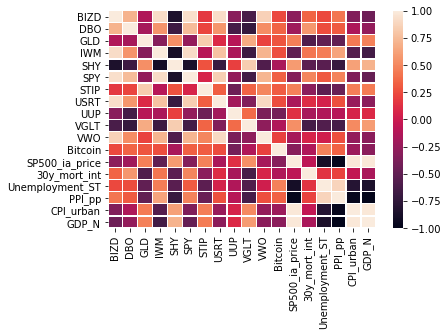

In [92]:
sns.heatmap(correlation,vmin=-1, vmax=1, linewidths = .2)

In [93]:
asset_prices_df.dtypes

BIZD       float64
DBO        float64
GLD        float64
IWM        float64
SHY        float64
SPY        float64
STIP       float64
USRT       float64
UUP        float64
VGLT       float64
VWO        float64
Bitcoin    float64
dtype: object

In [94]:
print (RSI(asset_prices_df, 14 ))

TypeError: unsupported operand type(s) for /: 'EWM' and 'EWM'

In [ ]:
def get_rsi_timeseries(prices, n=14):
    # RSI = 100 - (100 / (1 + RS))
    # where RS = (Wilder-smoothed n-period average of gains / Wilder-smoothed n-period average of -losses)
    # Note that losses above should be positive values
    # Wilder-smoothing = ((previous smoothed avg * (n-1)) + current value to average) / n
    # For the very first "previous smoothed avg" (aka the seed value), we start with a straight average.
    # Therefore, our first RSI value will be for the n+2nd period:
    #     0: first delta is nan
    #     1:
    #     ...
    #     n: lookback period for first Wilder smoothing seed value
    #     n+1: first RSI

    # First, calculate the gain or loss from one price to the next. The first value is nan so replace with 0.
    deltas = (prices-prices.shift(1)).fillna(0)

    # Calculate the straight average seed values.
    # The first delta is always zero, so we will use a slice of the first n deltas starting at 1,
    # and filter only deltas > 0 to get gains and deltas < 0 to get losses
    avg_of_gains = deltas[1:n+1][deltas > 0].sum() / n
    avg_of_losses = -deltas[1:n+1][deltas < 0].sum() / n

    # Set up pd.Series container for RSI values
    rsi_series = pd.Series(0.0, deltas.index)

    # Now calculate RSI using the Wilder smoothing method, starting with n+1 delta.
    up = lambda x: x if x > 0 else 0
    down = lambda x: -x if x < 0 else 0
    i = n+1
    
    for d in deltas[n+1:]:
        avg_of_gains = ((avg_of_gains * (n-1)) + up(d)) / n
        avg_of_losses = ((avg_of_losses * (n-1)) + down(d)) / n
        
        if avg_of_losses != 0:
            rs = avg_of_gains / avg_of_losses
            rsi_series[i] = 100 - (100 / (1 + rs))
        else:
            rsi_series[i] = 100
        i += 1

    return rsi_series

In [ ]:
for i in asset_prices_df.columns :
    print (get_rsi_timeseries(asset_prices_df[i]))

In [ ]:
#Logarythmic returns

log_ret = np.log(asset_prices_df[asset_prices_df.index > '2019-01-01']/asset_prices_df[asset_prices_df.index > '2019-01-01'].shift(1))
log_ret.head()

In [95]:
log_ret.hvplot.hist(bins=100, subplots=True, width=500, group_label='Ticker', grid=True).cols(3)

:NdLayout   [Default]
   :Histogram   [Bitcoin]   (Bitcoin_count)